Here we are trying to work with only one dataset, i.e. review.json of aroun 5.3 GB size

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
# open input file:
ifile = open('review.json')
# read the first 100k entries
# set to -1 to process everything
stop = 100000
all_data = list()
for i, line in enumerate(ifile):
    if i%10000==0:
        print(i)
    if i==stop:
        break
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    text = data['text']
    stars = data['stars']
    # add to the data collected so far
    all_data.append([stars, text])
# create the DataFrame
df = pd.DataFrame(all_data, columns=['stars','text'])
print(df)
# df.to_hdf('revie20ws.h5','reviews')
ifile.close()


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
       stars                                               text
0        1.0  Total bill for this horrible service? Over $8G...
1        5.0  I *adore* Travis at the Hard Rock's new Kelly ...
2        5.0  I have to say that this office really has it t...
3        5.0  Went in for a lunch. Steak sandwich was delici...
4        1.0  Today was my second out of three sessions I ha...
5        4.0  I'll be the first to admit that I was not exci...
6        3.0  Tracy dessert had a big name in Hong Kong and ...
7        1.0  This place has gone down hill.  Clearly they h...
8        2.0  I was really looking forward to visiting after...
9        3.0  It's a giant Best Buy with 66 registers.  I do...
10       4.0  Like walking back in time, every Saturday morn...
11       1.0  Walked in around 4 on a Friday afternoon, we s...
12       4.0  Wow. So surprised at the one and two star revi...
13       4.0  Michael from Red Carpet VIP

In [2]:
stars = df['stars'] 
sorted(stars.unique())

[1.0, 2.0, 3.0, 4.0, 5.0]

(array([14585.,  7975., 10970., 22103., 44367.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

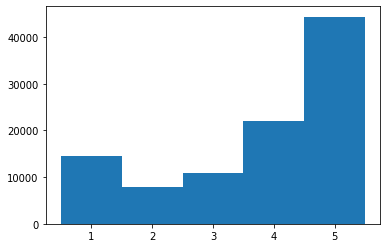

In [3]:
plt.hist(stars, range=(0.5, 5.5), bins=5)

(array([1.420e+02, 2.858e+03, 8.068e+03, 8.616e+03, 8.208e+03, 7.512e+03,
        6.845e+03, 5.985e+03, 5.340e+03, 4.904e+03, 4.233e+03, 3.712e+03,
        3.255e+03, 2.966e+03, 2.577e+03, 2.371e+03, 2.066e+03, 1.882e+03,
        1.713e+03, 1.549e+03, 1.336e+03, 1.270e+03, 1.079e+03, 9.760e+02,
        8.730e+02, 8.500e+02, 7.620e+02, 6.350e+02, 6.320e+02, 5.390e+02,
        5.270e+02, 4.470e+02, 4.230e+02, 3.710e+02, 3.520e+02, 3.100e+02,
        2.980e+02, 2.550e+02, 2.520e+02, 2.130e+02, 2.020e+02, 2.050e+02,
        1.600e+02, 1.670e+02, 1.360e+02, 1.390e+02, 1.180e+02, 1.180e+02,
        1.120e+02, 9.200e+01, 6.600e+01, 8.500e+01, 7.800e+01, 6.200e+01,
        6.600e+01, 7.300e+01, 4.800e+01, 5.000e+01, 5.400e+01, 4.800e+01,
        4.200e+01, 2.900e+01, 3.600e+01, 3.500e+01, 3.300e+01, 2.300e+01,
        3.600e+01, 2.500e+01, 2.300e+01, 2.100e+01, 2.300e+01, 2.500e+01,
        2.000e+01, 1.900e+01, 2.200e+01, 1.800e+01, 1.900e+01, 1.800e+01,
        1.500e+01, 9.000e+00, 9.000e+0

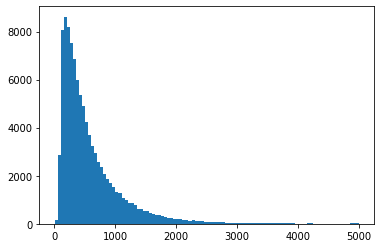

In [4]:
plt.clf() # clear previous figure
plt.hist(df['text'].str.len(), bins=100)

In [5]:
df.loc[ df['text'].str.len() == df['text'].str.len().max() ] 

,stars,text
31846,1.0,This place is awful. If quick and dirty brunch...
39095,1.0,My husband and I were so overly disappointed i...
78683,4.0,My review will focus on the Arizona State Fair...


In [6]:
print( df.loc[31846].text )

This place is awful. If quick and dirty brunch is your thing they definitely have the dirty part down pat--everything is filthy--but service is extremely slow.

FILTHY. Dust everywhere, dirty cups that were poorly washed and still have lip stains on them, and food that looked worse than you could make yourself at home while hungover weren't even the worst part of it. And don't look up unless you want to gaze at the dust bunnies living in the paper lanterns above your head. Not sure how they passed a health inspection looking like that.

The slow and rude service was the worst part. Our waitress was nice; the problem was with the manager or owner dude, who I will now refer to as 'Bruh' (pronounced something between 'bro' and 'bra'). It was taking a really long time to get my order. The waitress came by and put an order that looked like mine in front of me. Seconds later she came back and took it away. She had mistakenly brought it to the wrong table. She seemed new. No big deal. So the 

Now we try to work with our processed data file

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
datadir = '/home/hades/Videos/yelp'
h5 = h5py.File(datadir+'/data.h5')
d = h5['reviews']
d.shape

(6685900, 254)

In [3]:
print(d[0])


[    5     1     0     0   696    26    39  3348    26  1523    44   336
    64    14   153  5179  2731    24    72   172  4377   125   257  3044
  6568 10127  8410     3    33   277   219   501  8900     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

Here, we can have a look at the first entry. It is a positive one (5 stars in the first column) and one person found it useful. The review text is relatively short, and followed by the padding zero values.

To decode this review, we are going to use our Vocabulary class.

In [4]:
from vocabulary import Vocabulary
vocab = Vocabulary.load(datadir+'/index')
rev1 = d[0,1:]
rev1 = rev1[rev1!=0]
' '.join(vocab.decode(rev1))

'<UNK> helped out when locked out apartment he quick got at price sahara comparison all other area definately recommend top master situations requiring varying they get job done quickly proportions'

For what we want to do next, we load the whole dataset in memory, it's going to be faster:

In [5]:
d = d[:]

Let's plot the distribution of words in the reviews:

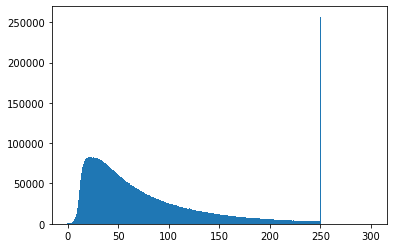

In [8]:
reviews = d[:,4:]
word_counts = np.count_nonzero(reviews, axis=1)
# the assignment to _ avoids a long useless printout
_ = plt.hist(word_counts,range=(-0.5,300.5),bins=301)

Since we have truncated our reviews at a maximum length of 250, all reviews which had more words end up in the last bin.

Now let's plot the rating distribution:

(array([1002159.,  542394.,  739280., 1468985., 2933082.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

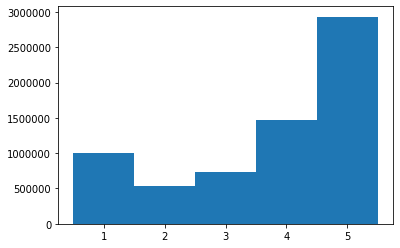

In [9]:
plt.hist(d[:,0], range=(0.5,5.5), bins=5)

Finally we can have a look at the correlation between review length and say, the rating or the usefulness. First we extract the values we want:

In [10]:
stars = d[:,0]
useful = d[:,1]
funny = d[:,2]
cool = d[:,3]

Then we create a dataframe:

In [11]:
import pandas as pd
df = pd.DataFrame({'useful':useful, 'wc':word_counts, 'stars':stars, 'funny':funny, 'cool':cool})
df

,useful,wc,stars,funny,cool
0,1,29,5,0,0
1,5,130,3,2,3
2,0,48,5,0,0
3,1,99,5,0,1
4,4,216,3,0,0
5,0,23,5,0,0
6,0,16,5,0,0
7,0,49,3,0,0
8,2,250,1,0,0
9,0,65,5,0,0


Now, we group by the number of words in the review, and we compute the mean for each of the other columns:

In [12]:
means = df.groupby('wc').mean()

First, let's see how the average rating evolves with the number of words:

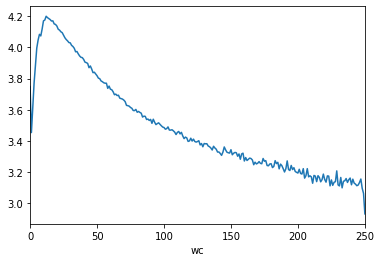

In [13]:
means['stars'].plot()

After a peak around 15 words, the average rating decreases steadily with the number of words. It looks like the more angry people are, the more they write.

Around 250, there is a sharp drop. This is simply due to the fact that we have truncated our ratings: over 250 words, the average rating keeps dropping steadily.

Now let's look at the average of the 'funny' score:

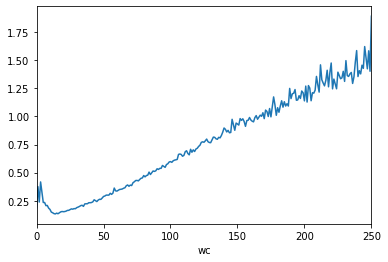

In [14]:
means['funny'].plot()

Long reviews are more funny than the short ones. But actually, some short reviews are funny too, and I'm not too sure why.